In [1]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input
from keras import regularizers
from clustering import Sample_Concrete, load_data
import numpy as np

Using TensorFlow backend.
/Users/matt_rounds/miniconda2/envs/XA3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/matt_rounds/miniconda2/envs/XA3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
scores = np.load('data/scores.npy')

In [4]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.expand_dims(np.max(x, axis=1), 1))
    return e_x / np.expand_dims(e_x.sum(axis=1), 1)

In [5]:
scores = softmax(scores)

In [6]:
x_train, y_train, x_val, y_val, yy_train, yy_val = load_data()

In [7]:
top_n = 28
sort_ids = np.zeros((scores.shape[0], top_n))

for idx in range(scores.shape[0]):
    sort_ids[idx,:] = np.argsort(scores[idx,:])[-top_n:]

In [8]:
num_keeps = 0
keeps = []

for i in range(784):
    if np.any(sort_ids == i):
        num_keeps += 1
        keeps.append(i)

In [9]:
kept_scores = np.copy(scores[:,keeps])

In [10]:
kept_scores_0 = np.zeros((int(np.sum(yy_val[:,0])),kept_scores.shape[1]))
kept_scores_0y = np.zeros(int(np.sum(yy_val[:,0])))
kept_scores_1 = np.zeros((int(np.sum(yy_val[:,1])),kept_scores.shape[1]))
kept_scores_1y = np.zeros(int(np.sum(yy_val[:,1])))

In [11]:
count0 = 0
count1 = 0

for idx in range(scores.shape[0]):
    if yy_val[idx,0] == 1:
        kept_scores_0[count0,:] = kept_scores[idx,:]
        kept_scores_0y[count0] = np.argmax(y_val[idx,:])
        count0 += 1
    else:
        kept_scores_1[count1,:] = kept_scores[idx,:]
        kept_scores_1y[count1] = np.argmax(y_val[idx,:])
        count1 += 1

In [12]:
n_cs = 5

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_cs)
kmeans.fit(kept_scores_0)
y_kmeans0 = kmeans.predict(kept_scores_0)

In [14]:
crossT0 = np.zeros((n_cs,5))

In [15]:
for i in range(y_kmeans0.shape[0]):
    a = int(y_kmeans0[i])
    b = int(kept_scores_0y[i])
    crossT0[a,b] += 1.

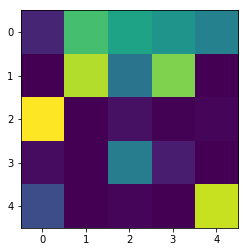

In [16]:
imshow(crossT0)

In [17]:
crossT0

array([[ 73., 503., 416., 370., 315.],
       [  0., 632., 275., 578.,   1.],
       [715.,   0.,  33.,   3.,   9.],
       [ 23.,   0., 299.,  58.,   2.],
       [169.,   0.,   9.,   1., 655.]])

In [18]:
kmeans1 = KMeans(n_clusters=n_cs)
kmeans1.fit(kept_scores_1)
y_kmeans1 = kmeans1.predict(kept_scores_1)

In [19]:
crossT1 = np.zeros((n_cs,5))

In [20]:
for i in range(y_kmeans1.shape[0]):
    a = int(y_kmeans1[i])
    b = int(kept_scores_1y[i]-5)
    crossT1[a,b] += 1.

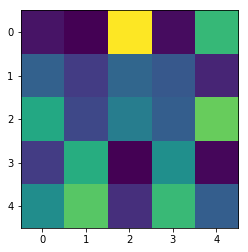

In [21]:
imshow(crossT1)

In [22]:
crossT1

array([[ 30.,   1., 543.,  20., 364.],
       [169.,  97., 180., 151.,  57.],
       [329., 119., 231., 164., 416.],
       [ 98., 339.,   1., 270.,  10.],
       [266., 402.,  73., 369., 162.]])

In [23]:
kmeans2 = KMeans(n_clusters = 2)

In [24]:
kmeans2.fit(kept_scores)
y_2 = kmeans2.predict(kept_scores)

In [25]:
cross_T2 = np.zeros((2,2))

for i in range(y_2.shape[0]):
    a = int(y_2[i])
    b = int(np.argmax(yy_val[i,:]))
    cross_T2[a,b] += 1.

In [26]:
yyy_train = np.expand_dims(np.argmax(yy_train, axis=1),1)

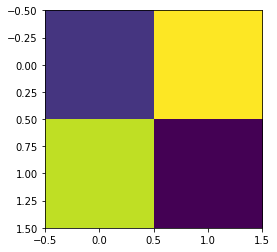

In [27]:
imshow(cross_T2)

In [28]:
cross_T2

array([[ 172., 4772.],
       [4967.,   89.]])

In [32]:
from xgboost import XGBClassifier
import xgboost

In [65]:
model = xgboost.train({'learning_rate': 0.1}, xgboost.DMatrix(x_train, yyy_train))
predictions = model.predict(xgboost.DMatrix(x_val))


[19:25:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:25:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:25:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:25:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:25:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[19:25:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:25:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[19:25:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[19:25:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned no

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
preds = np.array([int(item >= 0.5) for item in predictions], dtype='float32')

In [69]:
preds = keras.utils.to_categorical(preds, 2)

In [70]:
accuracy_score(preds, yy_val)

0.9151

In [73]:
preds.shape

(10000, 2)

In [75]:
train_preds = model.predict(xgboost.DMatrix(x_train))

In [76]:
train_preds = np.array([int(item >= 0.5) for item in train_preds], dtype='float32')

In [79]:
train_preds = keras.utils.to_categorical(train_preds, 2)

In [80]:
train_preds.shape

(60000, 2)

In [81]:
preds.shape

(10000, 2)

In [82]:
np.save('data/XG_pred_train.npy', train_preds)
np.save('data/XG_pred_val.npy', preds)